<a href="https://colab.research.google.com/github/samsharm/Python/blob/master/EDAProject_samtasharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Project on Facebook Data by Samta Sharma**









# **1. Problem Statement**

Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.

**Dataset**
Facebook data
Dataset link : https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv



# **2. Importing Packages**

In [ ]:
#importing essential packages
import sys                                                                      
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline   

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 


# **3. Loading Dataset**

In [ ]:
pd.set_option('display.max_columns', 100)   

fb = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")

**3.1 Describing Data**

In [ ]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

**3.2 Data Observations:**
1. There are total 99003 records in given database
2. Total variables are 15 in numbers
3. 13 variables are integer, 1(gender) is object, 1 (tenure) is float
4. Some columns needs more attension as gender as an Object
5. Missing values in Gender Column


In [ ]:
fb.describe(include= "all")

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


**3.3 Identified Data Cleaning Actions** 

1. Gender frequency is far less "58574/99003" and count column is also showing 98828.
2. Useful columns - age or dob_year, gender, tenure, friend_count, friendships_initiated, likes, likes_recieved, mobile_likes, www_likes_recieved
3. dob-day and dob_month can be dropped for this analysis


# **4. Pandas Profiling Installation**

In [ ]:
!pip install pandas-profiling==2.7.1
#!pip install pandas-profiling --upgrade

In [ ]:
import pandas_profiling                                                                                          
profile=pandas_profiling.ProfileReport(fb)

# **5. Pre-profiling**

In [ ]:
profile.to_file("fb_data_1.html") 

#profile.to_widgets()
#profile.to_notebook_iframe()

5.1 Identify Duplicates, if any


In [ ]:
duplicates=fb[fb.duplicated(keep=False)]
print(duplicates.shape[0],fb.shape[0])

0 99003


Conclusion: There are no duplicates value.

5.2 Clean-up Gender Column

In [ ]:
fb.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

Conclusion: Gender has 175 Null Values and Tenure has 2. To have a conclusive plotting, we can drop these records.

In [ ]:
fb.dropna(axis=0, subset=['gender'], inplace=True)


5.3 Cleanup tenure record by dropping two of null values

In [ ]:
fb.dropna (subset=['tenure'], inplace=True)
fb.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [ ]:
fb.shape               # Check number of records after dropping null value records

(98826, 15)

# **6. Run Post Profiling after Data Cleaning**

In [ ]:
profile=pandas_profiling.ProfileReport(fb)
profile.to_file("fb_data_2.html") 

# **7. Identified Types of Analysis** 
  
1.   Age-wise facebook user distribution 
2.   Genderwise user distribution
3.   Agewise Friendcount
4.   Genderwise friendship count
5.   Genderwise friendship initiated
6.   Patterns on likes and likes recieved 
7.   Patterns on mobile vs www (web likes)








 

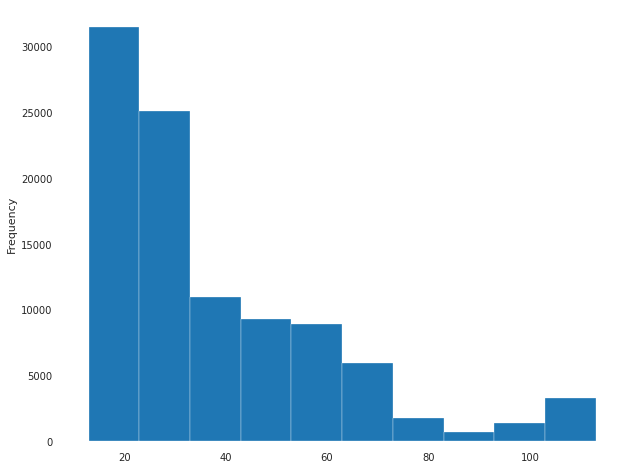

In [ ]:
plt.figure(figsize=[10,8], edgecolor = 'white')
fb['age'].plot(kind='hist')

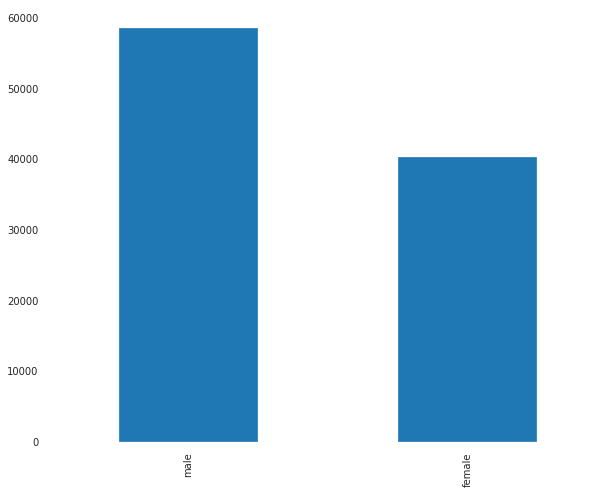

In [ ]:
plt.figure(figsize=[10,8], edgecolor = 'white')
fb['gender'].value_counts().plot(kind='bar')

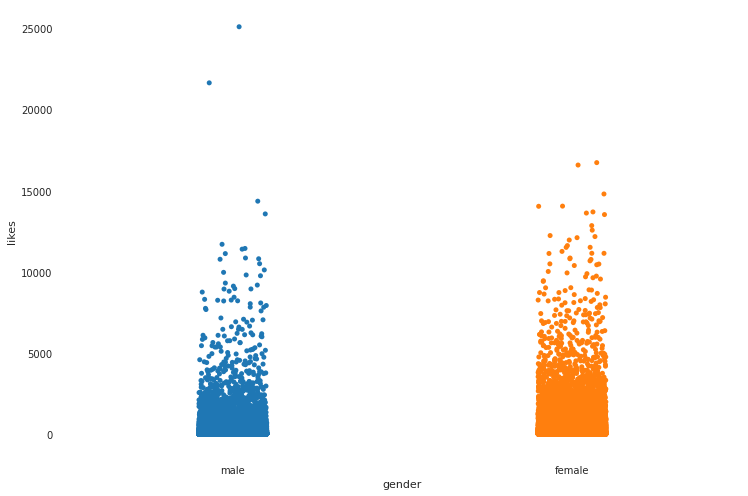

In [ ]:

sns.catplot(x="gender", y="likes", data=fb, height=7, aspect = 1.5)

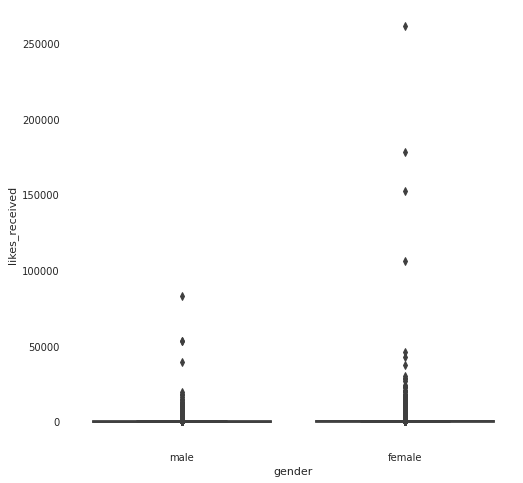

In [ ]:
plt.rcParams['figure.figsize']=8,8
sns.boxplot(x="gender", y="likes_received", data=fb)

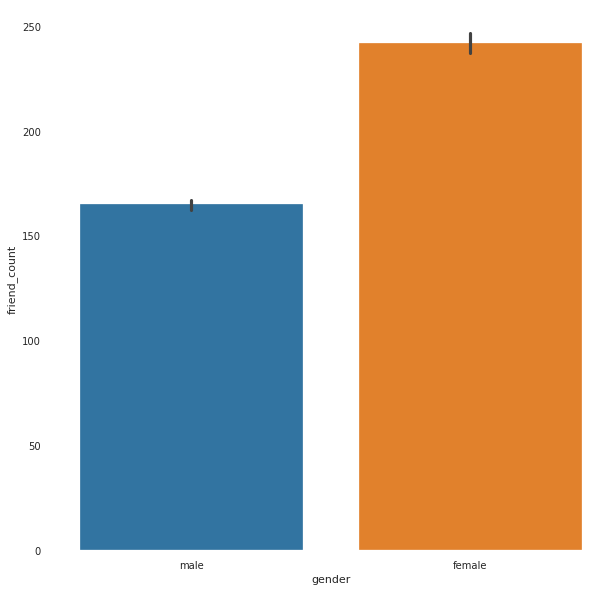

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.barplot(x='gender',y='friend_count', data=fb)

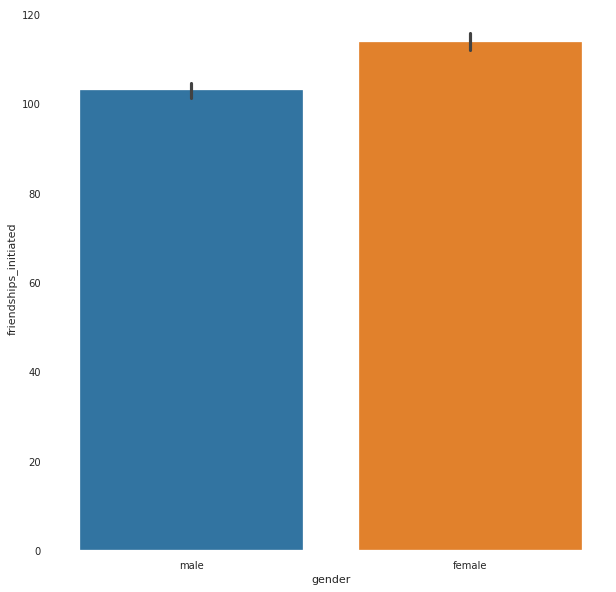

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.barplot(x='gender',y='friendships_initiated', data=fb)

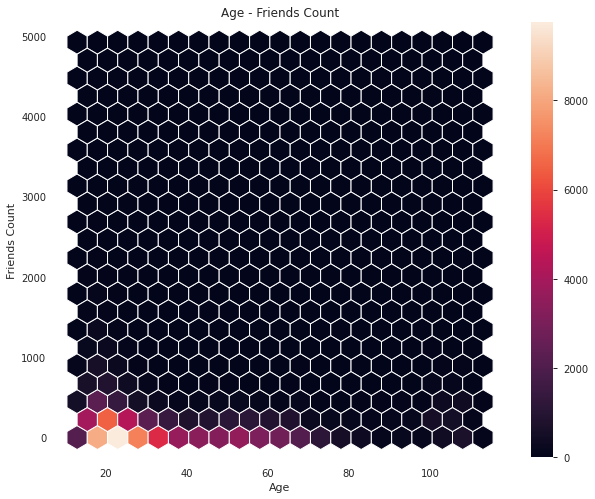

In [ ]:
#sns.linechart(x='age',y='friend_count', data=fb)
plt.figure(figsize=[10,8])
plt.hexbin(fb['age'],fb['friend_count'], gridsize=20, edgecolors='white')
plt.title('Age - Friends Count')
plt.xlabel('Age')
plt.ylabel('Friends Count')
plt.colorbar(mappable=None)
plt.show()

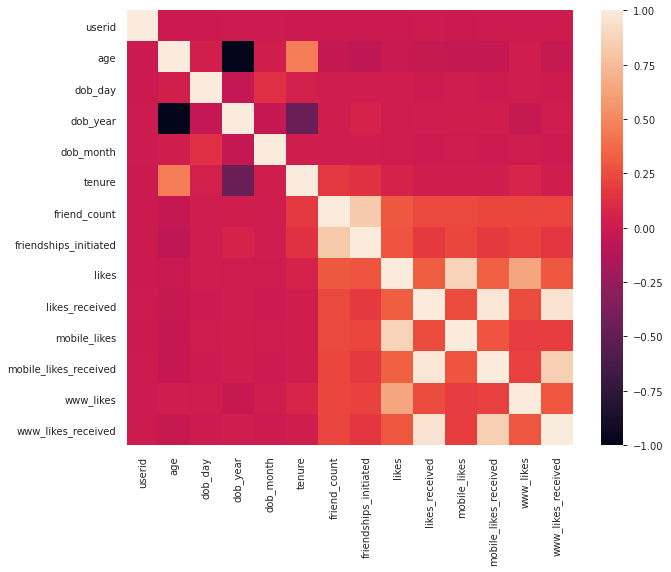

In [ ]:
plt.figure(figsize=[10,8])
corr_mat=fb.corr()
sns.heatmap(corr_mat, annot=False)

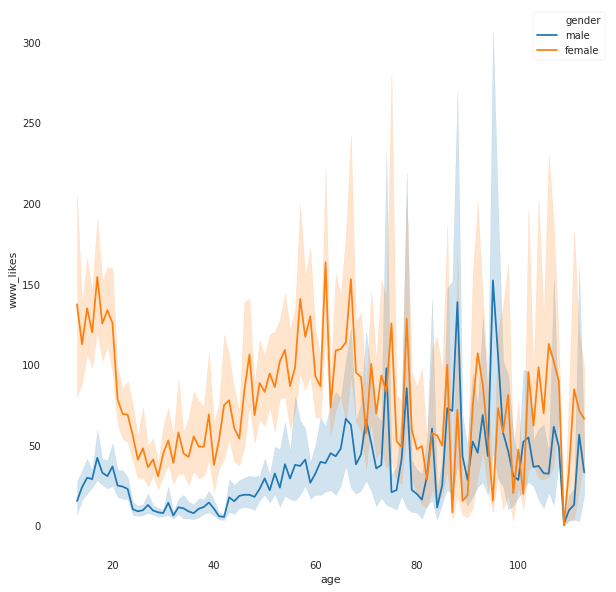

In [ ]:
sns.lineplot(x=fb['age'], y=fb['www_likes'], hue=fb['gender'])

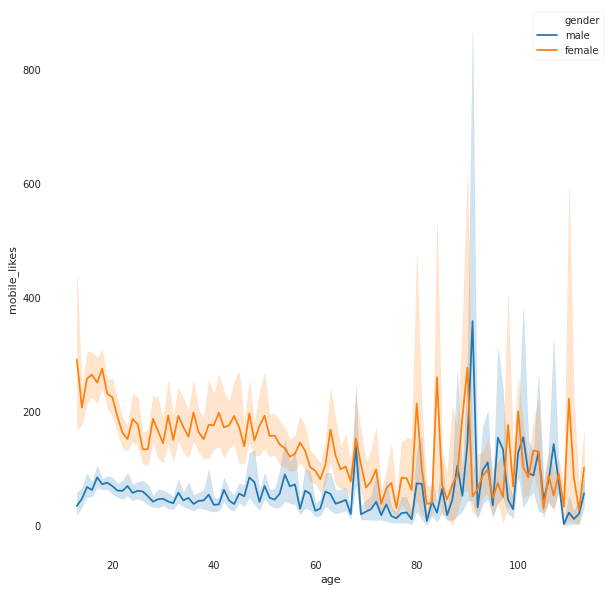

In [ ]:
sns.lineplot(x=fb['age'], y=fb['mobile_likes'], hue=fb['gender'])

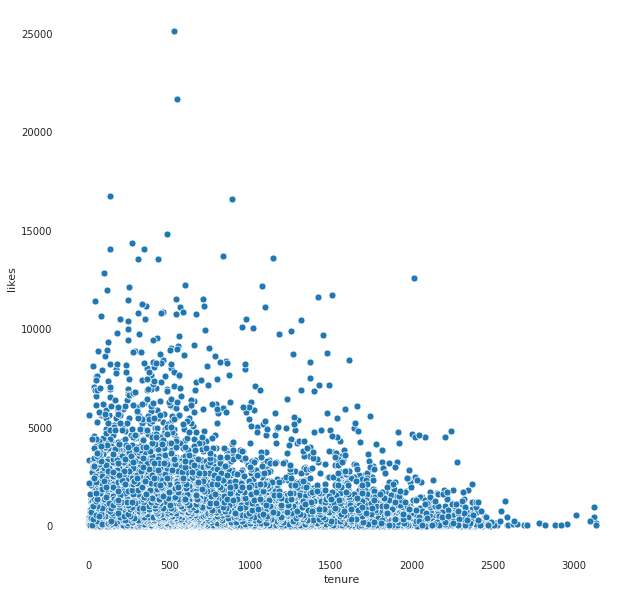

In [ ]:
sns.scatterplot(x=fb['tenure'], y=fb['likes'])